### Analysis

In [28]:
import os
import json
import pandas as pd
from datetime import datetime

# Folder where your JSON metrics are saved
metrics_dir = "/home/marcos/Escritorio/AI-prod/ML-Prod-Example/outputs/metrics/"

# List all JSON files for the experiment
json_files = [f for f in os.listdir(metrics_dir) if f.startswith("experiment_baseline") and f.endswith(".json")]


# Function to extract timestamp from filename
def extract_timestamp(filename):
    # Filename format: experiment_baseline_<exp>_<YYYYMMDD_HHMMSS>.json
    timestamp_str = filename.rstrip(".json").split("_")[-2] + "_" + filename.rstrip(".json").split("_")[-1]
    # Parse as datetime
    return datetime.strptime(timestamp_str, "%Y%m%d_%H%M%S")


json_files_sorted = sorted(json_files, key=extract_timestamp)

# Pick the last one (most recent)
latest_file = json_files_sorted[-1]
latest_path = os.path.join(metrics_dir, latest_file)

# Load the JSON
with open(latest_path, "r") as f:
    metrics = json.load(f)

print(f"Loaded metrics from: {latest_file}")

# --- Example: Display evaluation metrics in vertical DataFrame ---
eval_results = metrics["evaluation_results"]
metric_names = ["Loss", "Binary Accuracy", "Precision", "Recall"]  # adjust as needed
df_metrics = pd.DataFrame.from_dict({name: value for name, value in zip(metric_names, eval_results)}, 
                                    orient="index", columns=["Value"])
print(df_metrics)


Loaded metrics from: experiment_baseline_20250822_145935_20250822_175620.json
                    Value
Loss             0.062964
Binary Accuracy  0.991228
Precision        1.000000
Recall           0.976190


json_files_sorted is sorted by the save timestamp, so the last element is the most recent experiment.

You can also pick any specific experiment by index, e.g., json_files_sorted[0] for the oldest.

Once loaded, you can reuse your ROC / confusion matrix plotting code for visualization.

In [16]:
import json
import matplotlib.pyplot as plt
import numpy as np




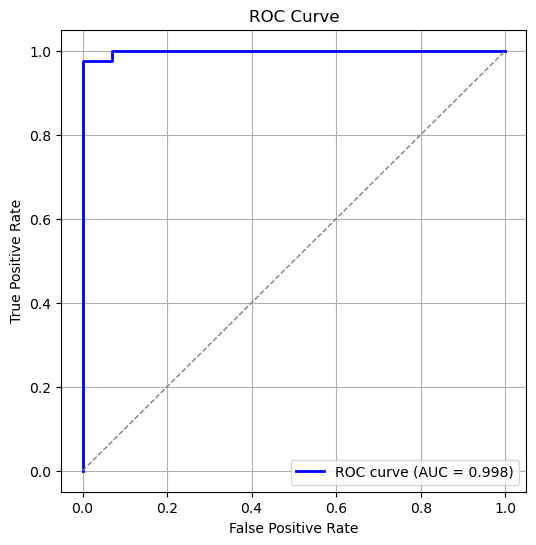

In [19]:
# --- Load JSON file ---
json_path = "/home/marcos/Escritorio/AI-prod/ML-Prod-Example/outputs/metrics/experiment_baseline_20250822_145935_20250822_175620.json"
with open(json_path, "r") as f:
    metrics = json.load(f)

# Extract ROC info
fpr = np.array(metrics["fpr"])
tpr = np.array(metrics["tpr"])
roc_auc = metrics["roc_auc"]

# --- Plot ROC curve ---
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], color='gray', lw=1, linestyle='--')  # random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# almost perfect!!!!!

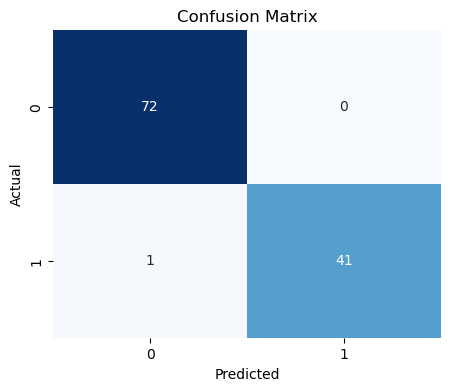

In [20]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Extract confusion matrix
conf_matrix = np.array(metrics["confusion_matrix"])

# --- Plot confusion matrix ---
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [22]:
import pandas as pd


# Extract evaluation metrics (assuming it's a list: loss, accuracy, etc.)
eval_results = metrics["evaluation_results"]

# You can name them appropriately if you know the order
metric_names = ["Loss", "Binary Accuracy", "Precision", "Recall"]  # adjust to your model
metrics_dict = {name: value for name, value in zip(metric_names, eval_results)}

# Create vertical DataFrame
df_metrics = pd.DataFrame.from_dict(metrics_dict, orient="index", columns=["Value"])
print(df_metrics)

                    Value
Loss             0.062964
Binary Accuracy  0.991228
Precision        1.000000
Recall           0.976190


In [23]:
df_metrics

,Value
Loss,0.062964
Binary Accuracy,0.991228
Precision,1.000000
Recall,0.976190


In [24]:
metrics["experiment"], metrics["timestamp"]

('experiment_baseline_20250822_145935', '20250822_175620')

Loaded metrics from: experiment_baseline_20250822_145935_20250822_180854.json


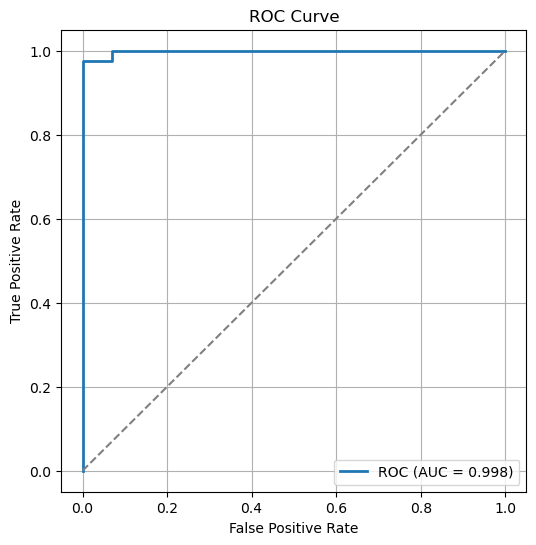

In [30]:
import os
import json
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

# --- Folder containing your metrics JSONs ---
metrics_dir = "/home/marcos/Escritorio/AI-prod/ML-Prod-Example/outputs/metrics/"

# List all JSON files for the experiment
json_files = [f for f in os.listdir(metrics_dir) if f.startswith("experiment_baseline") and f.endswith(".json")]

# Function to extract timestamp from filename
def extract_timestamp(filename):
    # Filename format: experiment_baseline_<exp>_<YYYYMMDD_HHMMSS>.json
    timestamp_str = filename.rstrip(".json").split("_")[-2] + "_" + filename.rstrip(".json").split("_")[-1]
    # Parse as datetime
    return datetime.strptime(timestamp_str, "%Y%m%d_%H%M%S")

# Sort files by timestamp
json_files_sorted = sorted(json_files, key=extract_timestamp)

# Pick the last one (most recent)
latest_file = json_files_sorted[-1]
latest_path = os.path.join(metrics_dir, latest_file)

# Load the latest JSON
with open(latest_path, "r") as f:
    metrics = json.load(f)

print(f"Loaded metrics from: {latest_file}")

# --- Plot ROC curve ---
fpr = np.array(metrics["fpr"])
tpr = np.array(metrics["tpr"])
roc_auc = metrics["roc_auc"]

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, lw=2, label=f'ROC (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()
